# An Analysis of Ice and Fire

This is meant to be a simple analysis of some aspects from the book series A song of Ice and Fire.

In [60]:
import numpy as np
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('ggplot')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import pandas as pd

## Reading the books 

In [30]:
books = [ open('00'+str(i)+'ssb.txt','r').read() for i in range(1,6) ]

## Family importances

Let's analyze the presence of the most well known noble houses by counting the number of mentions across all the published books:

In [76]:
families = pd.DataFrame({
    'Stark': np.char.count(books, 'Stark'), 
    'Lannister': np.char.count(books, 'Lannister'),
    'Targaryen': np.char.count(books, 'Targaryen'),
    'Baratheon': np.char.count(books, 'Baratheon'),
    'Bolton': np.char.count(books, 'Bolton'),
    'Tully': np.char.count(books, 'Tully'),
    'Martell': np.char.count(books, 'Martell'),
    'Arryn': np.char.count(books, 'Arryn'),
})

cum_counts = families.cumsum()
cum_counts

,Arryn,Baratheon,Bolton,Lannister,Martell,Stark,Targaryen,Tully
0,148,61,20,455,3,449,78,72
1,192,153,94,748,21,777,111,111
2,246,227,234,1019,59,1042,165,189
3,305,271,258,1165,91,1169,196,256
4,323,349,439,1333,137,1344,293,272


Since House Stark and House Lannister are by far the most present ones, we will split them into a different plot:

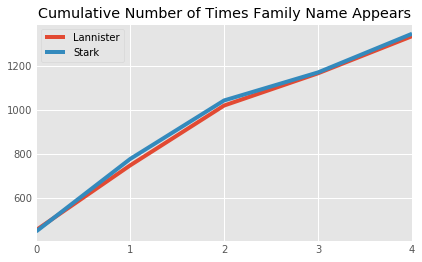

In [77]:
cum_counts[['Lannister','Stark']].plot()
plots.xticks( range(5) )
plots.title('Cumulative Number of Times Family Name Appears');

And the rest of the noble houses:

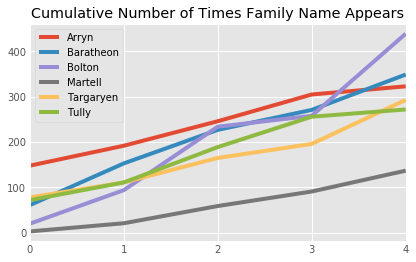

In [78]:
cum_counts.drop(['Lannister','Stark'], axis=1).plot()
plots.xticks( range(5) )
plots.title('Cumulative Number of Times Family Name Appears');

It's quite remarkable the rise of importance of House Bolton and the presence of House Baratheon, even though the majority of its members are not in the last books.

## Character Importance

Now, let's see the importance of each member within the different families.

### Stark

In [79]:
stark = pd.DataFrame({
    'Ned': np.char.count(books, 'Ned'),
    'Catelyn': np.char.count(books, 'Catelyn'),
    'Robb': np.char.count(books, 'Rob'),
    'Arya': np.char.count(books, 'Arya'),
    'Sansa': np.char.count(books, 'Sansa'),
    'Bran': np.char.count(books, 'Bran'),
    'Jon': np.char.count(books, 'Jon')
})

cum_counts = stark.cumsum()
cum_counts

,Arya,Bran,Catelyn,Jon,Ned,Robb,Sansa
0,456,593,480,829,785,826,416
1,891,1044,762,1298,858,1288,703
2,1373,1352,1065,2128,937,1910,1207
3,1503,1365,1105,2256,950,2169,1352
4,1603,1585,1113,3148,980,2335,1372


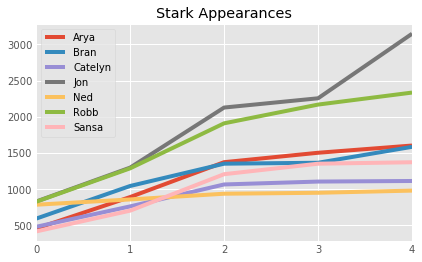

In [80]:
cum_counts.plot()
plots.xticks( range(5) )
plots.title('Stark Appearances');

Although he is "oficially" born a bastard, Jon Snow is, by far, the most important member of House Stark. Also, it's interesting that Robb Stark is still the second most important member of the family and both parents are the least mentioned.

### Lannister

In [83]:
lannister = pd.DataFrame({
    'Tywin': np.char.count(books, 'Tywin'),
    'Cersei': np.char.count(books, 'Cersei'),
    'Jaime': np.char.count(books, 'Jaime'),
    'Tyrion': np.char.count(books, 'Tyrion'),
    'Joffrey': np.char.count(books, 'Joffrey'),
    'Tommen': np.char.count(books, 'Tommen')
})

cum_counts = lannister.cumsum()
cum_counts

,Cersei,Jaime,Joffrey,Tommen,Tyrion,Tywin
0,115,146,215,23,607,151
1,341,249,481,56,1273,266
2,576,818,749,99,1919,478
3,1075,1427,813,319,2004,619
4,1210,1545,844,386,2647,692


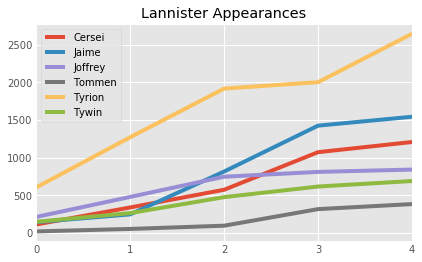

In [84]:
cum_counts.plot()
plots.xticks( range(5) )
plots.title('Lannister Appearances');

Similar to Jon Snow, Tyrion is, by far, the most important member of House Lannister, followed by his brother Jaime and his sister Cersei.

## Writing style

Now, we will focus on analyzing the different writing styles across the books.

In [121]:
lengths = []
for book in books:
    l = book.split('.')
    lengths.append(sum(map(len, l))/float(len(l)))
books_features = pd.DataFrame({
        'Book Length': [len(s) for s in books],
        'Average sentence length': lengths
})

In [122]:
books_features

,Average sentence length,Book Length
0,62.666403,1607894
1,64.584062,1785066
2,62.093420,2321269
3,61.388837,1723553
4,67.813454,2340551
